In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-capacity-of-kids/LungCapData.csv


In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
df = pd.read_csv('/kaggle/input/lung-capacity-of-kids/LungCapData.csv')
df.head()

,Unnamed: 0,LungCap,Age,Height,Smoke,Gender,Caesarean
0,1,6.475,6,62.1,no,male,no
1,2,10.125,18,74.7,yes,female,no
2,3,9.550,16,69.7,no,female,yes
3,4,11.125,14,71.0,no,male,no
4,5,4.800,5,56.9,no,male,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  725 non-null    int64  
 1   LungCap     725 non-null    float64
 2   Age         725 non-null    int64  
 3   Height      725 non-null    float64
 4   Smoke       725 non-null    object 
 5   Gender      725 non-null    object 
 6   Caesarean   725 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 39.8+ KB


<Axes: >

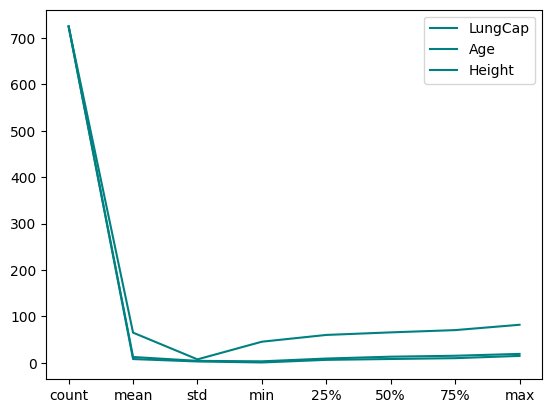

In [4]:
df = df.drop('Unnamed: 0',axis=1)
df.describe().plot(kind='line',color='teal')

In [5]:
df.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

LungCap      float64
Age            int64
Height       float64
Smoke         object
Gender        object
Caesarean     object
dtype: object

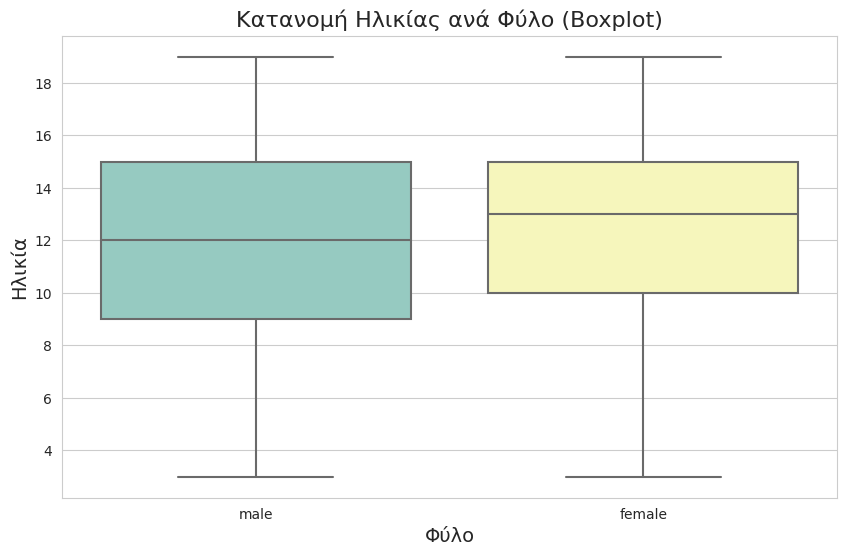

In [9]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.boxplot(x='Gender', y='Age', data=df, palette='Set3')
plt.title('Κατανομή Ηλικίας ανά Φύλο (Boxplot)', fontsize=16)
plt.xlabel('Φύλο', fontsize=14)
plt.ylabel('Ηλικία', fontsize=14)
plt.show()


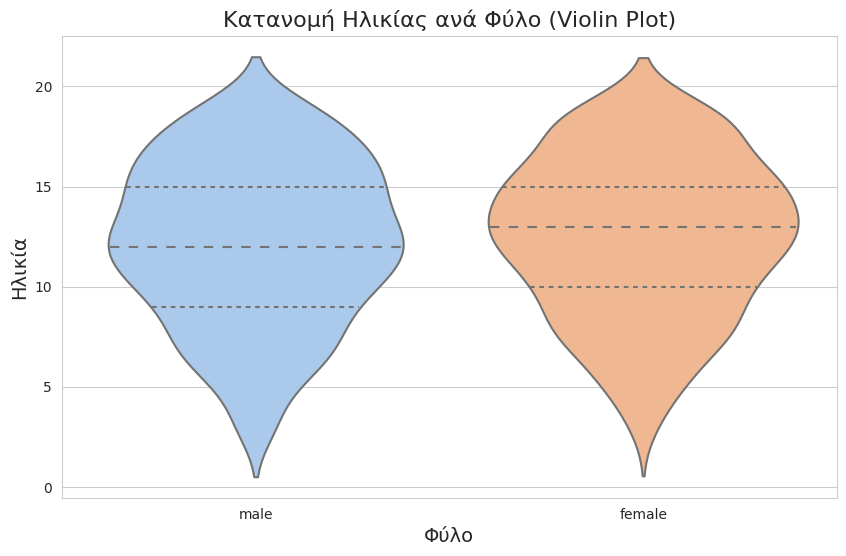

In [10]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.violinplot(x='Gender', y='Age', data=df, palette='pastel', inner='quartile')
plt.title('Κατανομή Ηλικίας ανά Φύλο (Violin Plot)', fontsize=16)
plt.xlabel('Φύλο', fontsize=14)
plt.ylabel('Ηλικία', fontsize=14)
plt.show()


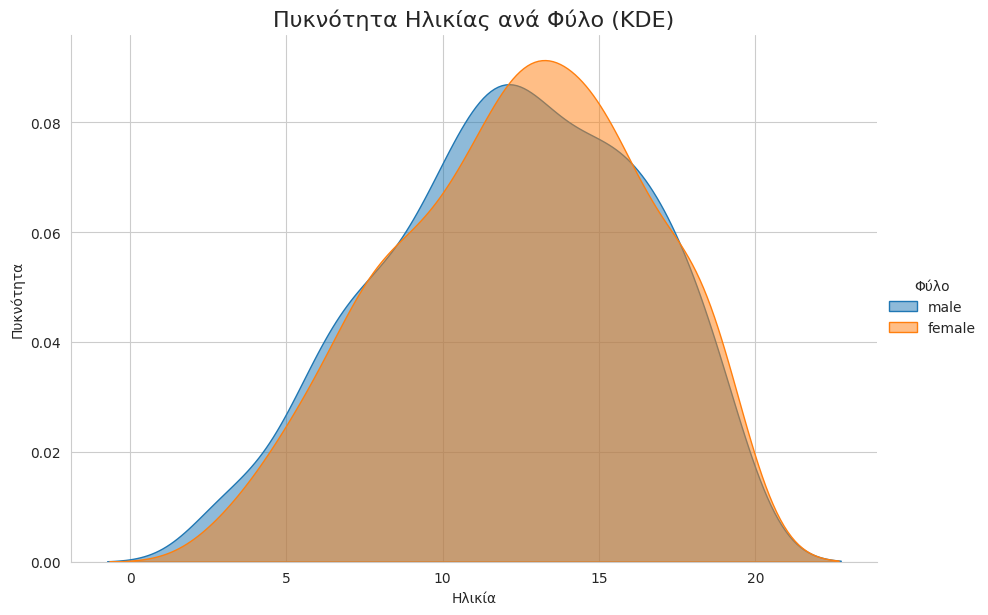

In [11]:
g = sns.FacetGrid(df, hue="Gender", height=6, aspect=1.5)
g.map(sns.kdeplot, "Age", fill=True, common_norm=False, alpha=0.5)
g.add_legend(title="Φύλο")
plt.title('Πυκνότητα Ηλικίας ανά Φύλο (KDE)', fontsize=16)
plt.xlabel('Ηλικία')
plt.ylabel('Πυκνότητα')
plt.show()


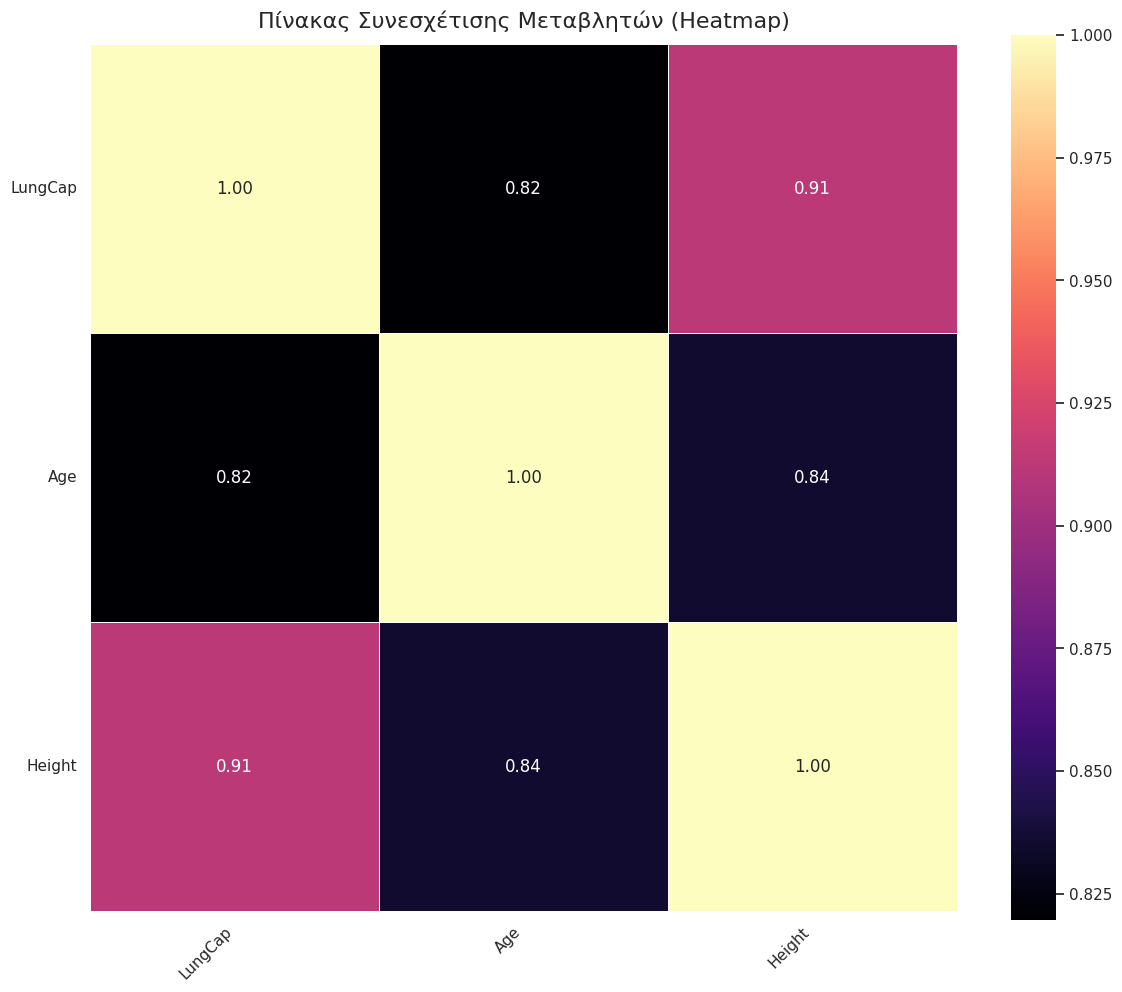

In [12]:
plt.figure(figsize=(12,10))
sns.set(style='white')  
correlation = df.corr(numeric_only=True)

heatmap = sns.heatmap(
    correlation,
    annot=True,
    fmt=".2f",  # 2 δεκαδικά ψηφία
    cmap='magma',
    cbar=True,
    linewidths=0.5,  # λεπτές γραμμές μεταξύ κελιών
    linecolor='white',
    square=True  # τετράγωνα κελιά
)

plt.title('Πίνακας Συνεσχέτισης Μεταβλητών (Heatmap)', fontsize=16, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


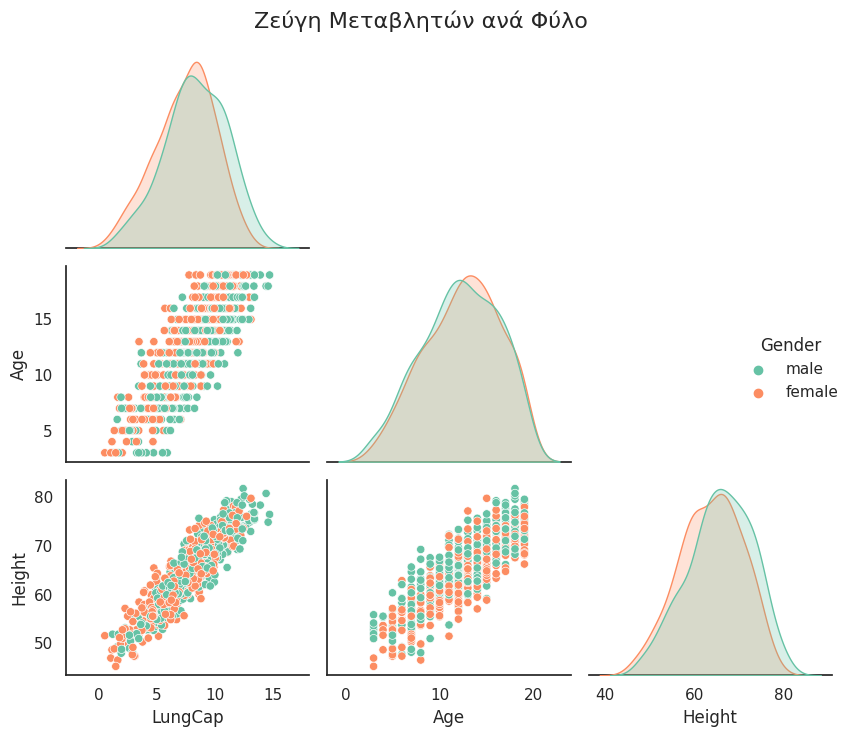

In [13]:
sns.pairplot(df, hue='Gender', corner=True, diag_kind='kde', palette='Set2')
plt.suptitle('Ζεύγη Μεταβλητών ανά Φύλο', fontsize=16)
plt.tight_layout()
plt.show()


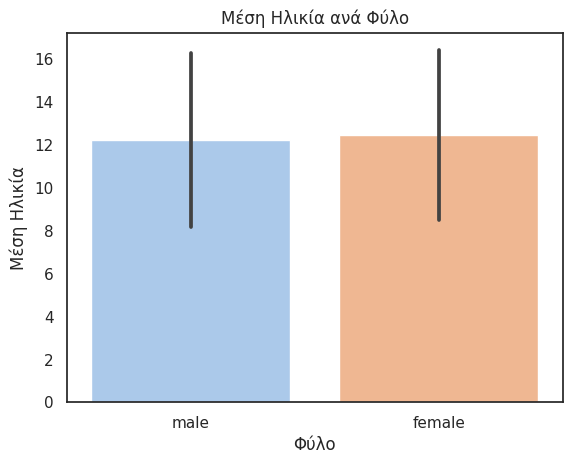

In [14]:
sns.barplot(x='Gender', y='Age', data=df, ci='sd', palette='pastel')
plt.title('Μέση Ηλικία ανά Φύλο')
plt.xlabel('Φύλο')
plt.ylabel('Μέση Ηλικία')
plt.show()


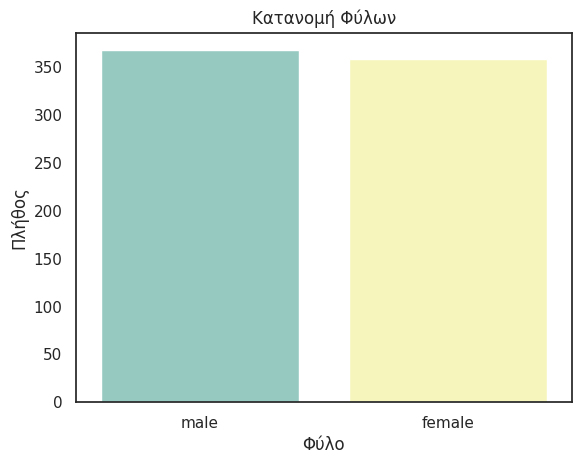

In [15]:
sns.countplot(x='Gender', data=df, palette='Set3')
plt.title('Κατανομή Φύλων')
plt.xlabel('Φύλο')
plt.ylabel('Πλήθος')
plt.show()


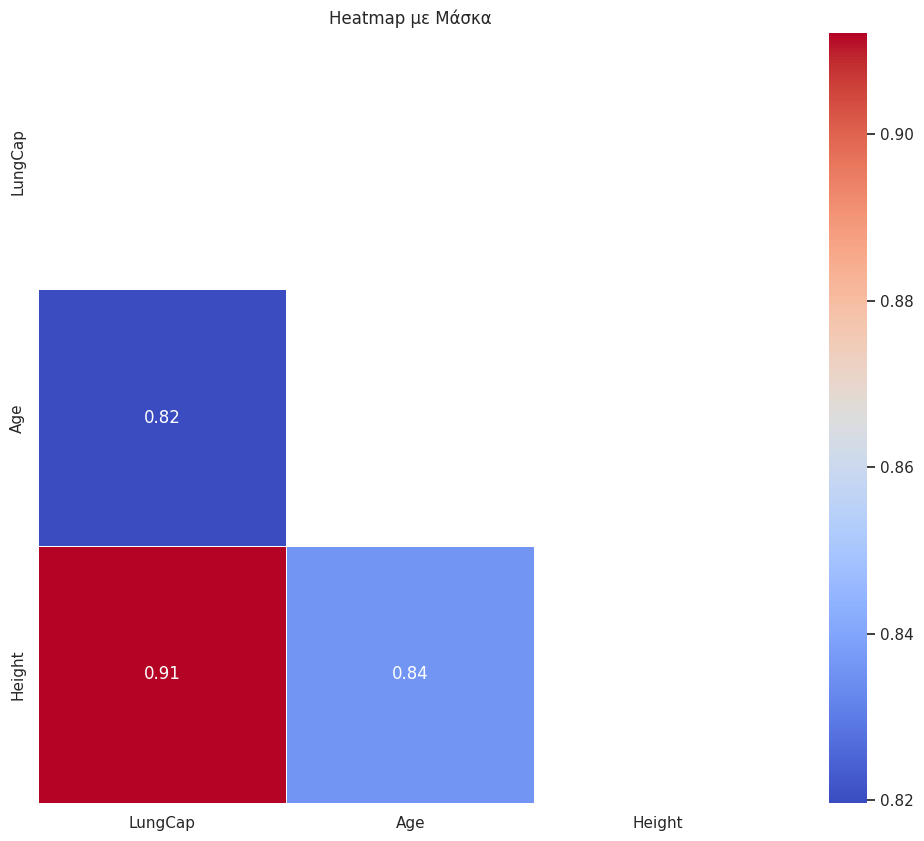

In [17]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Heatmap με Μάσκα')
plt.show()


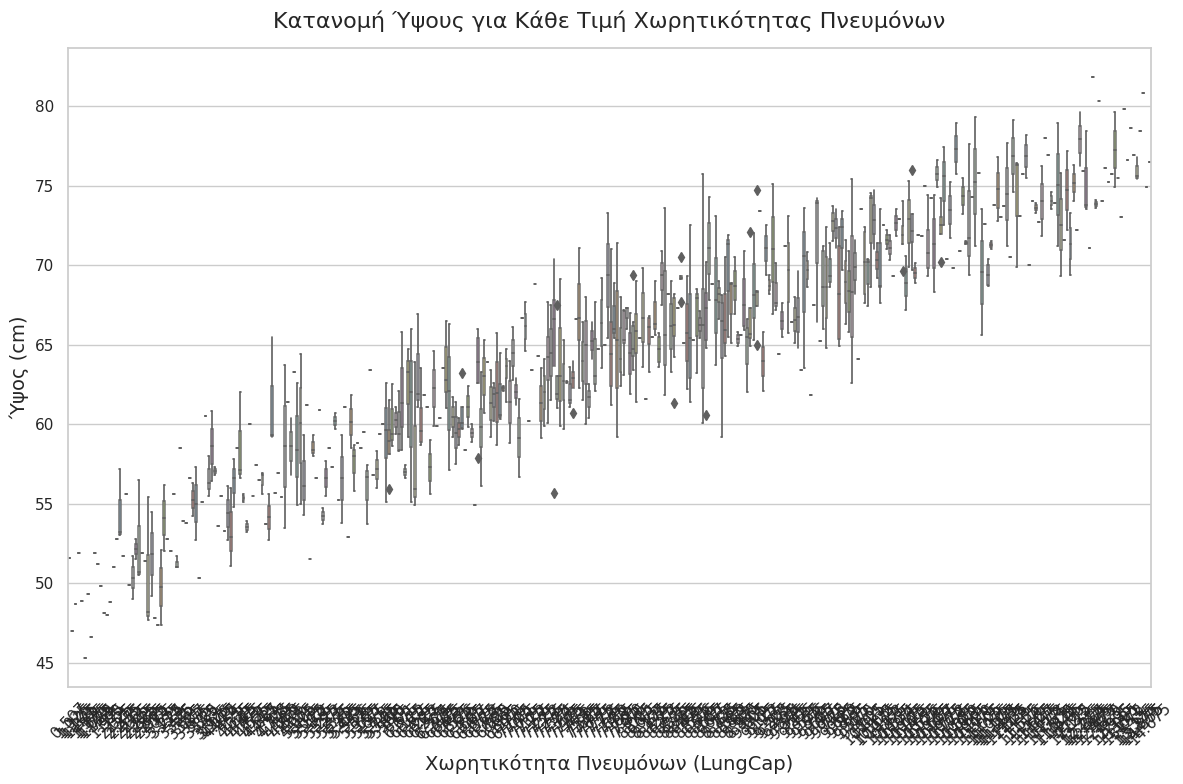

In [19]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

sns.boxplot(
    x='LungCap',
    y='Height',
    data=df,
    palette='Set3',
    width=0.6,
    linewidth=1.2,
    boxprops=dict(alpha=0.8)
)

plt.title('Κατανομή Ύψους για Κάθε Τιμή Χωρητικότητας Πνευμόνων', fontsize=16, pad=15)
plt.xlabel('Χωρητικότητα Πνευμόνων (LungCap)', fontsize=14)
plt.ylabel('Ύψος (cm)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


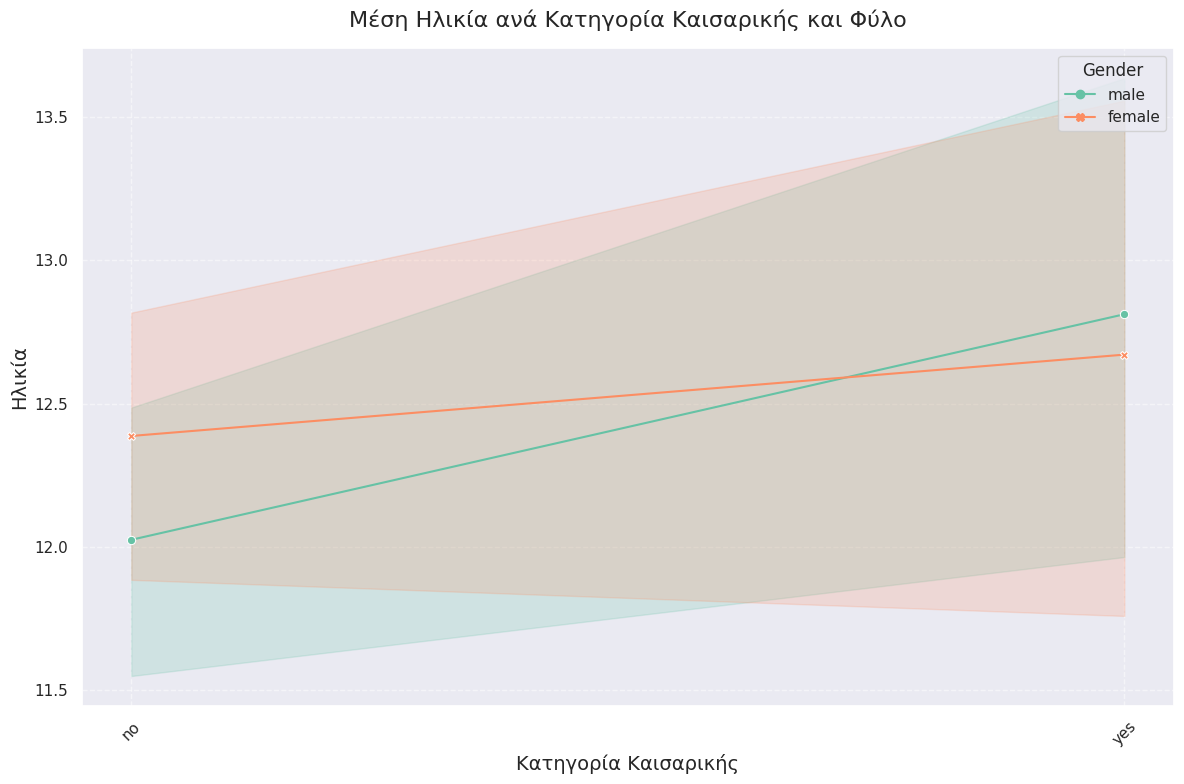

In [20]:
plt.figure(figsize=(12, 8))
plt.style.use('dark_background')
sns.set_style("darkgrid")

sns.lineplot(
    x='Caesarean',
    y='Age',
    data=df,
    hue='Gender',
    style='Gender',
    markers=True,
    dashes=False,
    palette='Set2'
)

plt.title('Μέση Ηλικία ανά Κατηγορία Καισαρικής και Φύλο', fontsize=16, pad=15)
plt.xlabel('Κατηγορία Καισαρικής', fontsize=14)
plt.ylabel('Ηλικία', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


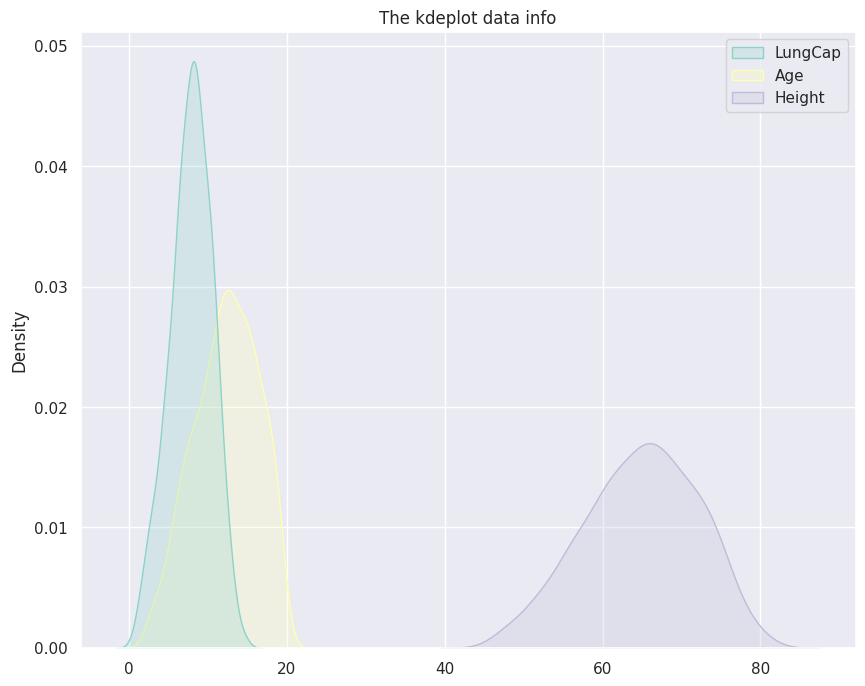

In [22]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.kdeplot(data=df,fill=True)
plt.title('The kdeplot data info')
plt.grid(True)
plt.show()

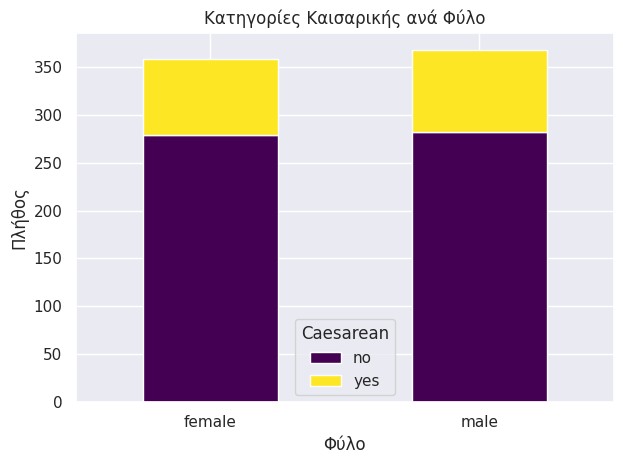

In [24]:
cross = pd.crosstab(df['Gender'], df['Caesarean'])
cross.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Κατηγορίες Καισαρικής ανά Φύλο')
plt.xlabel('Φύλο')
plt.ylabel('Πλήθος')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


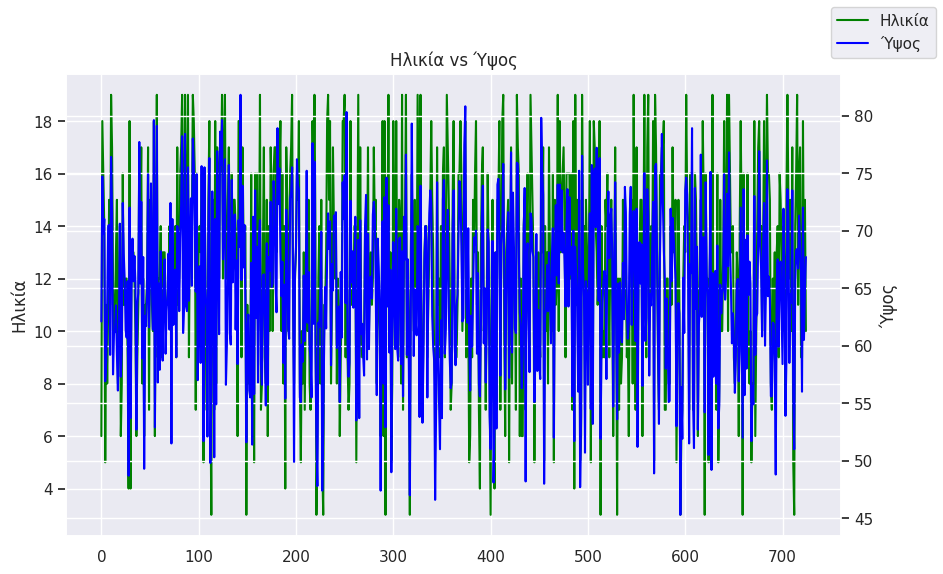

In [25]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

ax1.plot(df['Age'], color='green', label='Ηλικία')
ax2.plot(df['Height'], color='blue', label='Ύψος')

ax1.set_ylabel('Ηλικία')
ax2.set_ylabel('Ύψος')
plt.title('Ηλικία vs Ύψος')
fig.legend(loc='upper right')
plt.show()


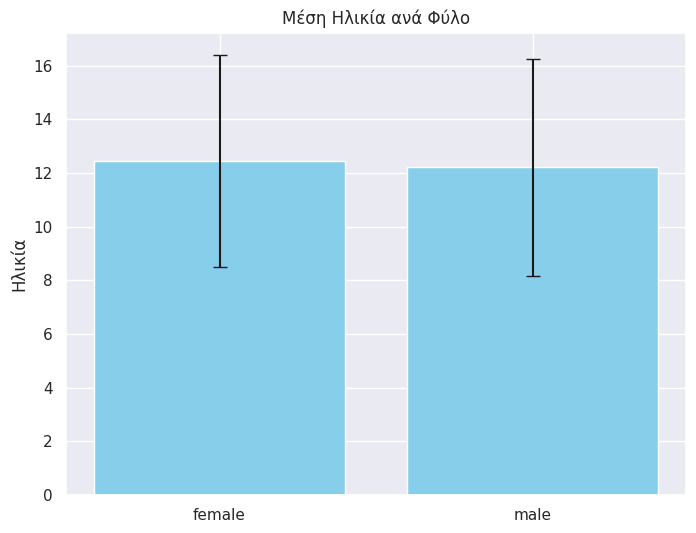

In [26]:
grouped = df.groupby('Gender')['Age'].agg(['mean', 'std']).reset_index()
plt.figure(figsize=(8,6))
plt.bar(grouped['Gender'], grouped['mean'], yerr=grouped['std'], capsize=5, color='skyblue')
plt.title('Μέση Ηλικία ανά Φύλο')
plt.ylabel('Ηλικία')
plt.grid(True, axis='y')
plt.show()


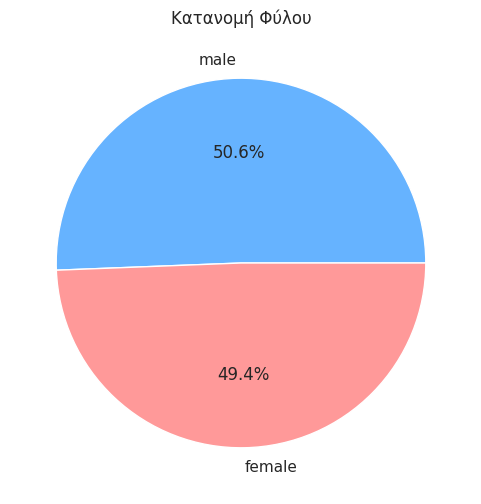

In [27]:
plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Κατανομή Φύλου')
plt.ylabel('')  # κρύβει το ylabel
plt.show()


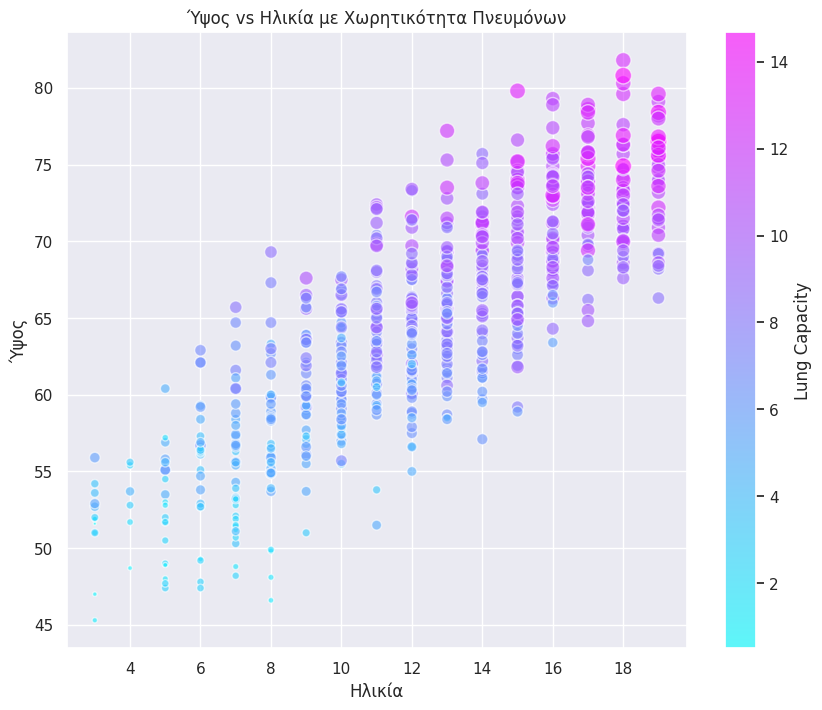

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(df['Age'], df['Height'], s=df['LungCap']*10, c=df['LungCap'], cmap='cool', alpha=0.6, edgecolors='w')
plt.colorbar(label='Lung Capacity')
plt.xlabel('Ηλικία')
plt.ylabel('Ύψος')
plt.title('Ύψος vs Ηλικία με Χωρητικότητα Πνευμόνων')
plt.grid(True)
plt.show()


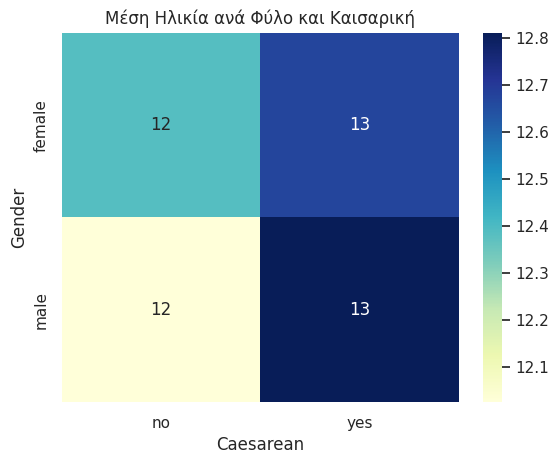

In [30]:
pivot = df.pivot_table(values='Age', index='Gender', columns='Caesarean', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Μέση Ηλικία ανά Φύλο και Καισαρική')
plt.show()


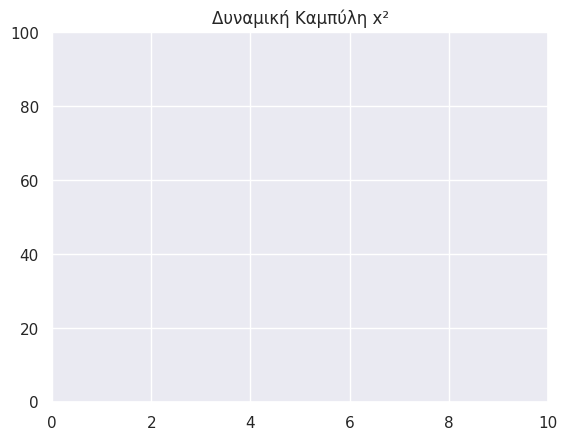

In [31]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

x_data, y_data = [], []

def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 100)
    return line,

def update(frame):
    x_data.append(frame)
    y_data.append(frame**2)  # αλλαγή με frame
    line.set_data(x_data, y_data)
    return line,

ani = animation.FuncAnimation(fig, update, frames=range(0, 10), init_func=init, blit=True)
plt.title('Δυναμική Καμπύλη x²')
plt.show()


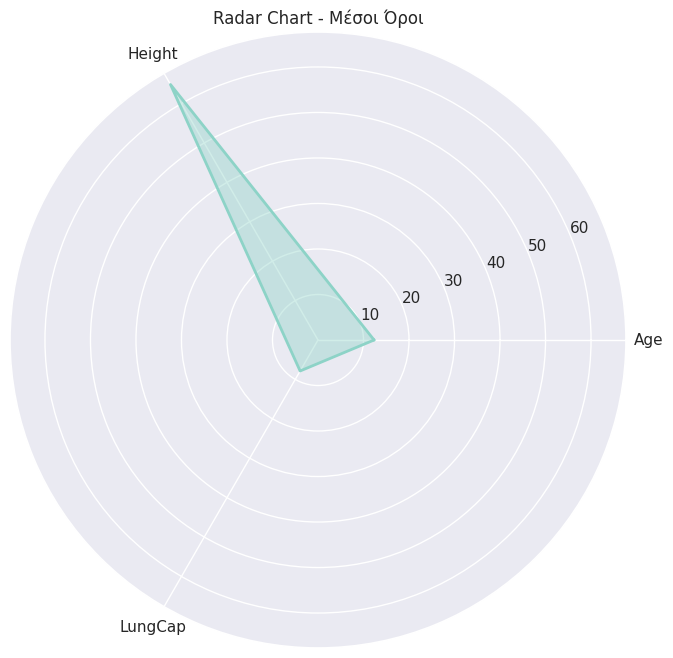

In [33]:
from math import pi

categories = ['Age', 'Height', 'LungCap']
values = df[categories].mean().tolist()

values += values[:1]  # κλείνει ο κύκλος
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories)

ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, alpha=0.4)
plt.title('Radar Chart - Μέσοι Όροι')
plt.show()


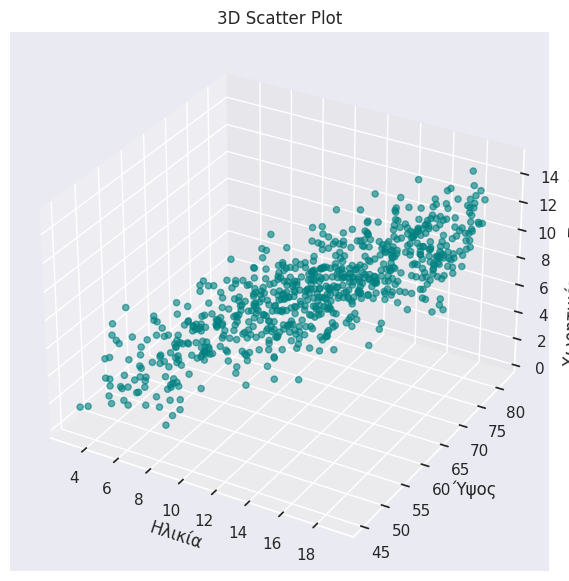

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Age'], df['Height'], df['LungCap'], c='teal', alpha=0.6)
ax.set_xlabel('Ηλικία')
ax.set_ylabel('Ύψος')
ax.set_zlabel('Χωρητικότητα Πνευμόνων')
plt.title('3D Scatter Plot')
plt.show()


In [40]:
print(df.columns)


Index(['LungCap', 'Age', 'Height', 'Smoke', 'Gender', 'Caesarean'], dtype='object')


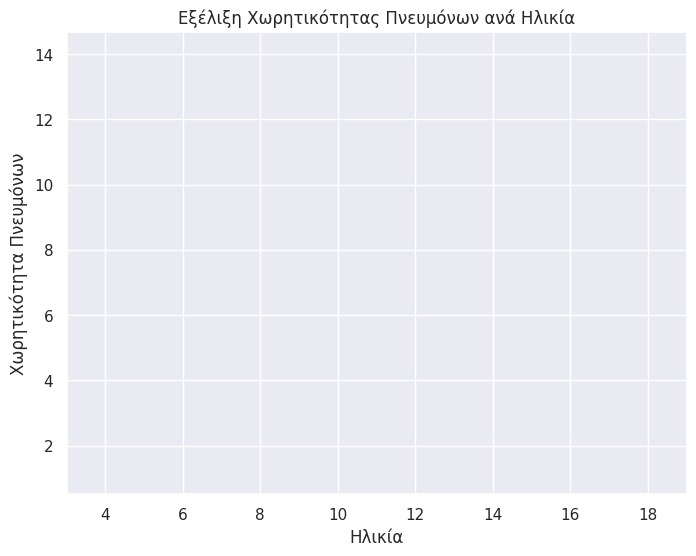

In [41]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Δημιουργία γραφήματος
fig, ax = plt.subplots(figsize=(8,6))

# Πρώτα ταξινομούμε τα δεδομένα με βάση την ηλικία για να έχουμε μια σειρά
df_sorted = df.sort_values('Age')

# Δημιουργία του γραφήματος (γραμμή που θα κινούνται τα σημεία)
line, = ax.plot([], [], 'o-', lw=2)

# Ρυθμίζουμε τις τιμές για τον άξονα x και y
x_data, y_data = [], []

def init():
    ax.set_xlim(df_sorted['Age'].min(), df_sorted['Age'].max())
    ax.set_ylim(df_sorted['LungCap'].min(), df_sorted['LungCap'].max())
    return line,

def update(frame):
    x_data.append(df_sorted['Age'].iloc[frame])
    y_data.append(df_sorted['LungCap'].iloc[frame])
    line.set_data(x_data, y_data)
    return line,

ani = animation.FuncAnimation(fig, update, frames=range(0, len(df_sorted)), init_func=init, blit=True)
plt.title('Εξέλιξη Χωρητικότητας Πνευμόνων ανά Ηλικία')
plt.xlabel('Ηλικία')
plt.ylabel('Χωρητικότητα Πνευμόνων')
plt.show()


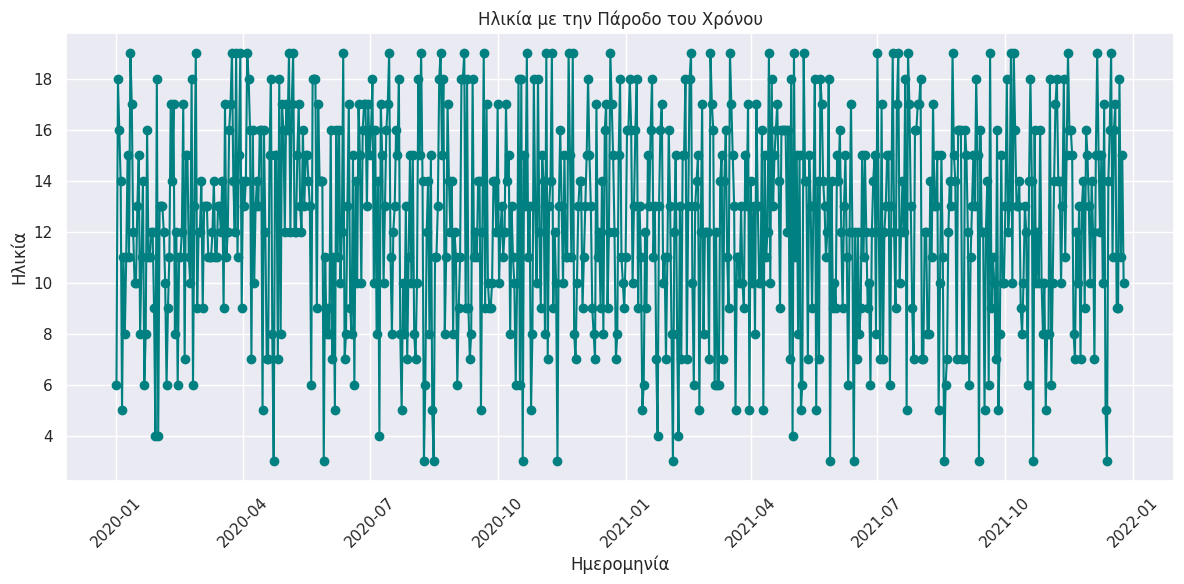

In [42]:
# Δημιουργία τεχνητής σειράς ημερομηνιών (στην ουσία αναπαριστά την ηλικία ως χρόνο)
df['Date'] = pd.date_range(start='2020-01-01', periods=len(df), freq='D')

# Δημιουργία timeline plot
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Age'], marker='o', linestyle='-', color='teal')
plt.title('Ηλικία με την Πάροδο του Χρόνου')
plt.xlabel('Ημερομηνία')
plt.ylabel('Ηλικία')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


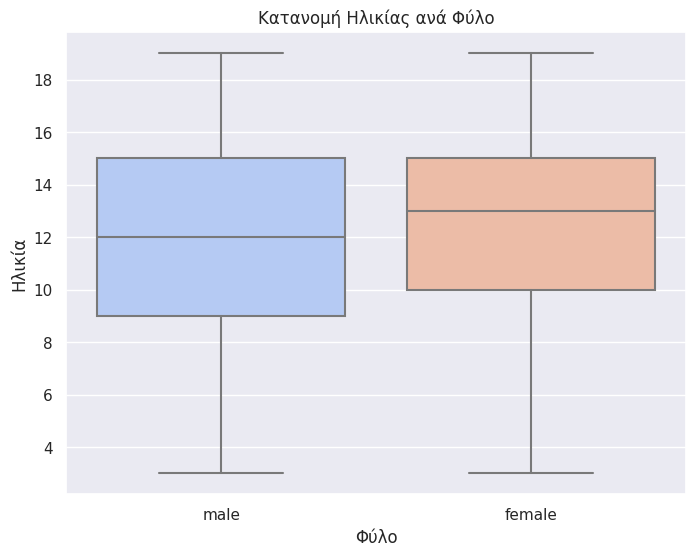

In [43]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Age', data=df, palette='coolwarm')
plt.title('Κατανομή Ηλικίας ανά Φύλο')
plt.xlabel('Φύλο')
plt.ylabel('Ηλικία')
plt.show()


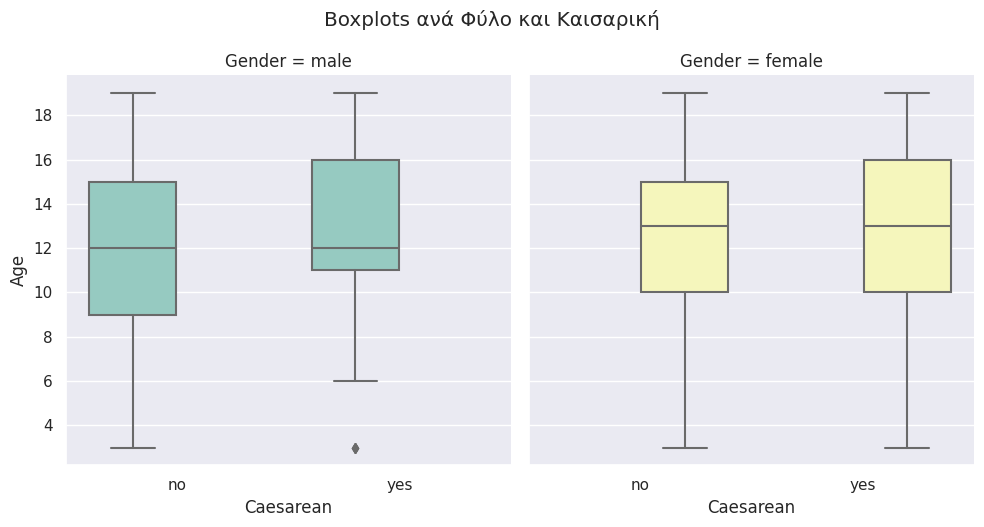

In [36]:
sns.catplot(data=df, x='Caesarean', y='Age', hue='Gender', kind='box', col='Gender', height=5, aspect=1)
plt.suptitle('Boxplots ανά Φύλο και Καισαρική', y=1.05)
plt.show()


In [38]:
import plotly.express as px

fig = px.scatter(df, x='Age', color='Gender', size='LungCap', title='Plotly Interactive Bubble Plot')
fig.show()
